In [1]:
#importing the required libraries

import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

We have stock information for the following banks from 03-Jan-2006 to 31-Dec-2012:

Bank of America - BAC.csv

CitiGroup - C.csv

Goldman Sachs - GS.csv

JPMorgan Chase - JPM.csv

Morgan Stanley - MS.csv

Wells Fargo & Co. - WFC.csv

In [2]:
# reading data from different banks

bac = pd.read_csv('BAC.csv')
c = pd.read_csv('C.csv')
gs = pd.read_csv('GS.csv')
jpm = pd.read_csv('JPM.csv')
ms = pd.read_csv('MS.csv')
wfc = pd.read_csv('WFC.csv')

In [3]:
# creating a pandas dataframe from all the available data

tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']
columns = ['Open','High','Low','Close','Volume']
bank_stocks = pd.concat( [bac[columns], c[columns], gs[columns], jpm[columns], ms[columns], wfc[columns]], axis=1, keys=tickers )
bank_stocks.insert(0, 'Date', bac['Date'])
bank_stocks.head()

Date    BAC                                     C                \
                Open   High    Low  Close    Volume   Open   High    Low   
0  2006-01-03  46.92  47.18  46.15  47.08  16296700  490.0  493.8  481.1   
1  2006-01-04  47.00  47.24  46.45  46.58  17757900  488.6  491.0  483.5   
2  2006-01-05  46.58  46.83  46.32  46.64  14970900  484.4  487.8  484.0   
3  2006-01-06  46.80  46.91  46.35  46.57  12599800  488.8  489.0  482.0   
4  2006-01-09  46.72  46.97  46.36  46.60  15620000  486.0  487.4  483.0   

          ...     MS                                  WFC                \
   Close  ...   Open   High    Low  Close   Volume   Open   High    Low   
0  492.9  ...  57.17  58.49  56.74  58.31  5377000  31.60  31.98  31.20   
1  483.8  ...  58.70  59.28  58.35  58.35  7977800  31.80  31.82  31.36   
2  486.2  ...  58.55  58.59  58.02  58.51  5778000  31.50  31.56  31.31   
3  486.2  ...  58.77  58.85  58.05  58.57  6889800  31.58  31.78  31.38   
4  483.9  ...  58.63  59.29  58.62  59.19  4144500  31.68  31.82  31.56   

                    
   Close    Volume  
0  31.90  11016400  
1  31.53  10871000  
2  31.50  10158000  
3  31.68   8403800  
4  31.68   5619600  

[5 rows x 31 columns]

In [4]:
# reading the basic info from the dataframe

bank_stocks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 31 columns):
(Date, )         2517 non-null object
(BAC, Open)      2517 non-null float64
(BAC, High)      2517 non-null float64
(BAC, Low)       2517 non-null float64
(BAC, Close)     2517 non-null float64
(BAC, Volume)    2517 non-null int64
(C, Open)        2517 non-null float64
(C, High)        2517 non-null float64
(C, Low)         2517 non-null float64
(C, Close)       2517 non-null float64
(C, Volume)      2517 non-null int64
(GS, Open)       2517 non-null float64
(GS, High)       2517 non-null float64
(GS, Low)        2517 non-null float64
(GS, Close)      2517 non-null float64
(GS, Volume)     2517 non-null int64
(JPM, Open)      2517 non-null float64
(JPM, High)      2517 non-null float64
(JPM, Low)       2517 non-null float64
(JPM, Close)     2517 non-null float64
(JPM, Volume)    2517 non-null int64
(MS, Open)       2517 non-null float64
(MS, High)       2517 non-null float64
(MS, 

In [5]:
# checking if there are any nan values

bank_stocks.isna().sum().sum()

0

In [6]:
# checking datatype of 'Date' column
type(bank_stocks.Date[0])

str

In [7]:
# converting string type values in 'Date' column to pandas datetime
bank_stocks.Date = pd.to_datetime(bank_stocks.Date)
bank_stocks.Date.dtype

dtype('<M8[ns]')

In [8]:
# setting date as the index
bank_stocks.set_index('Date', inplace=True)
bank_stocks.head()

BAC                                     C                       \
             Open   High    Low  Close    Volume   Open   High    Low  Close   
Date                                                                           
2006-01-03  46.92  47.18  46.15  47.08  16296700  490.0  493.8  481.1  492.9   
2006-01-04  47.00  47.24  46.45  46.58  17757900  488.6  491.0  483.5  483.8   
2006-01-05  46.58  46.83  46.32  46.64  14970900  484.4  487.8  484.0  486.2   
2006-01-06  46.80  46.91  46.35  46.57  12599800  488.8  489.0  482.0  486.2   
2006-01-09  46.72  46.97  46.36  46.60  15620000  486.0  487.4  483.0  483.9   

                     ...     MS                                  WFC         \
             Volume  ...   Open   High    Low  Close   Volume   Open   High   
Date                 ...                                                      
2006-01-03  1537660  ...  57.17  58.49  56.74  58.31  5377000  31.60  31.98   
2006-01-04  1871020  ...  58.70  59.28  58.35  58.35  7977800  31.80  31.82   
2006-01-05  1143160  ...  58.55  58.59  58.02  58.51  5778000  31.50  31.56   
2006-01-06  1370250  ...  58.77  58.85  58.05  58.57  6889800  31.58  31.78   
2006-01-09  1680740  ...  58.63  59.29  58.62  59.19  4144500  31.68  31.82   

                                    
              Low  Close    Volume  
Date                                
2006-01-03  31.20  31.90  11016400  
2006-01-04  31.36  31.53  10871000  
2006-01-05  31.31  31.50  10158000  
2006-01-06  31.38  31.68   8403800  
2006-01-09  31.56  31.68   5619600  

[5 rows x 30 columns]

Q. Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock.
Returns are typically defined by:

return = {   p_(t)  -  p_(t-1)   }   /   p_(t-1)
        
        = {p_(t) / p_(t-1)} - 1

 We can use pandas pct_change() method on the Close column to create a column representing this return value. Create a for loop that goes and for each Bank Stock Ticker creates this returns column and set's it as a column in the returns DataFrame.

In [9]:
returns = pd.DataFrame()

for e in tickers:
    returns[e + '_Return'] = bank_stocks.xs('Close',axis=1,level=1)[e].pct_change()
returns.head()

,BAC_Return,C_Return,GS_Return,JPM_Return,MS_Return,WFC_Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.000951
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005714
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,0.000000


Q. Create a pairplot using seaborn of the returns dataframe.


Pairplot of 'returns' DataFrame


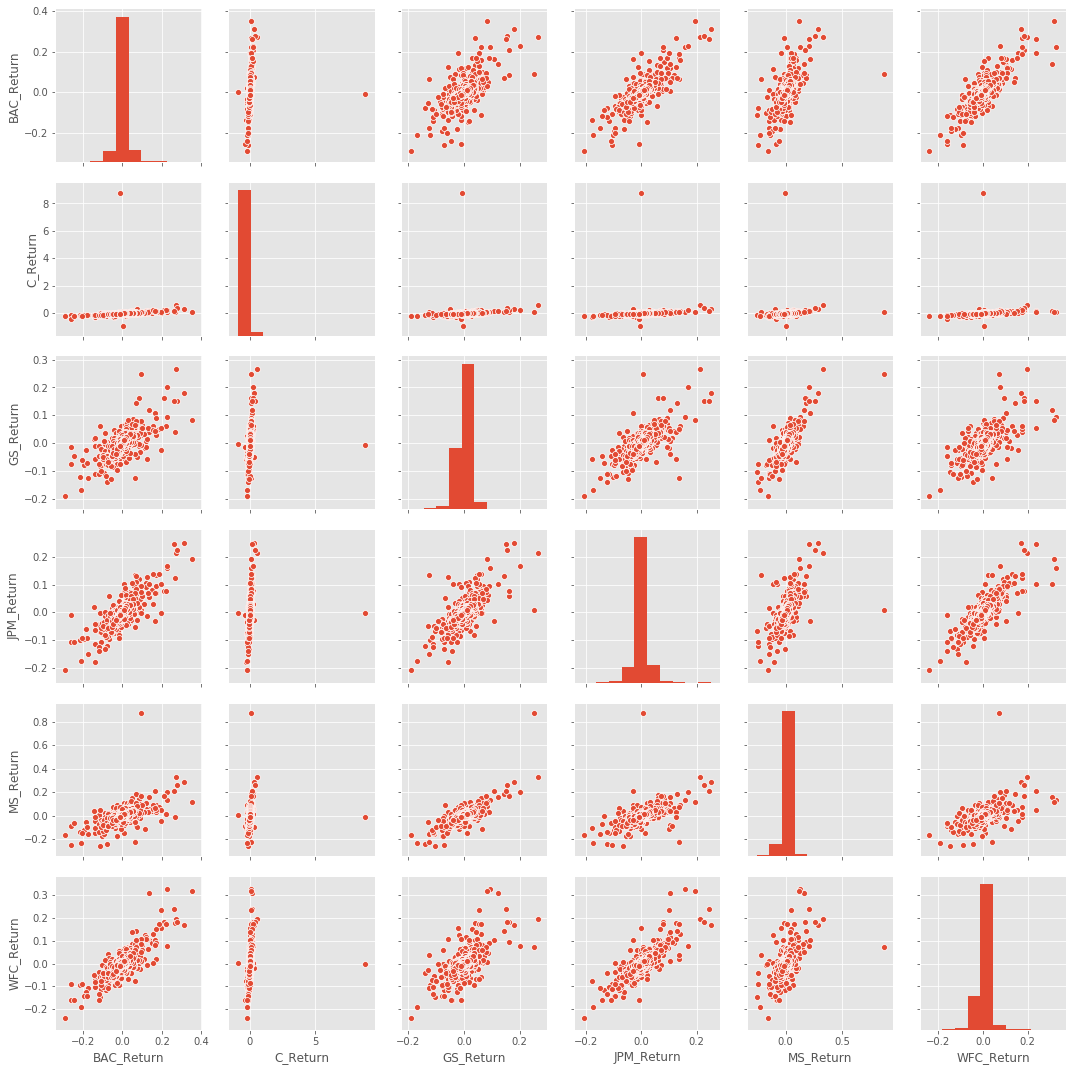

In [10]:
plt.style.use('ggplot')

sns.pairplot(returns[1:])
print(r"Pairplot of 'returns' DataFrame")

Q. What stock stands out to you? Can you figure out why?

Ans. In the above figure Citigroup's stock clearly stands out.This behavior was due their stock crashing during the financial crisis.

Quoting Wikipedia:
"On November 17, 2008, Citigroup announced plans for about 52,000 new job cuts, on top of 23,000 cuts already made during 2008 in a huge job cull resulting from four quarters of consecutive losses and reports that it was unlikely to be in profit again before 2010. The same day on Wall Street markets responded, with shares falling and dropping the company's market capitalization to $6 billion, down from $300 billion two years prior. Eventually staff cuts totaled over 100,000 employees. Its stock market value dropped to $ 20.5 billion, down from $ 244 billion two years earlier. Shares of Citigroup common stock traded well below $ 1.00 on the New York Stock Exchange."

Q. Using this returns DataFrame, figure out on what dates each bank stock had the best and worst single day returns.

In [11]:
print(f"Worst single day returns:\n\n{returns.idxmin()}\n\nBest single dy returns:\n\n{returns.idxmax()}")

Worst single day returns:

BAC_Return   2009-01-20
C_Return     2011-05-06
GS_Return    2009-01-20
JPM_Return   2009-01-20
MS_Return    2008-10-09
WFC_Return   2009-01-20
dtype: datetime64[ns]

Best single dy returns:

BAC_Return   2009-04-09
C_Return     2011-05-09
GS_Return    2008-11-24
JPM_Return   2009-01-21
MS_Return    2008-10-13
WFC_Return   2008-07-16
dtype: datetime64[ns]


Q. You should notice that 4 of the banks share the same day for the worst drop, did anything significant happen that day?

Ans. From Wikipedia and Guardian:

The first inauguration of Barack Obama as the 44th President of the United States took place on Tuesday, January 20, 2009. It was one of the most-observed events ever by the global audience.

In his speech, Obama reasserted his desire for tougher regulation, saying that the present crisis was a reminder that "without a watchful eye, the market can spin out of control". Anxious traders compared the gathering sense of foreboding to the near panic which swept through markets. Bank of America, under pressure over its takeover of loss-making Merrill Lynch, saw its shares dive by 29%. JP Morgan dropped 21%, Citigroup lost 20%, Wells Fargo slid by 24% and Goldman Sachs fell 19%.

In [12]:
# checking the std. deviation of the returns of the different banks
returns.std()

BAC_Return    0.036650
C_Return      0.179969
GS_Return     0.025346
JPM_Return    0.027656
MS_Return     0.037820
WFC_Return    0.030233
dtype: float64

From above data, Citigroup is the riskiest due to greater deviation

Q. You should have noticed that Citigroup's largest drop and biggest gain were very close to one another. Did anything significant happen in that time frame?

Ans. From Wall Street Jounal:

On May 9th, 2011, Citigroup Inc. became a $40 stock for the first time since late 2007, as its share price appeared to rise more than 850% from Friday's close.
Citigroup, the heaviest-traded U.S. stock that accounted for 6.8% of total U.S. stock trading volume last year, drastically shrunk its share count. The move instantly erased its single-digit stock price, which has been a persistent reminder of the trauma the bank suffered during the financial crisis.

This came after, Vikram Pandit, CEO of Citigroup at that time, announced a 1-For-10 reverse stock split.

In [13]:
# checking the std. deviation of returns after the inverse split by Citigroup on May9th, 2011
returns.loc['2011-05-10':'2015-12-31'].std()

BAC_Return    0.023222
C_Return      0.021542
GS_Return     0.016965
JPM_Return    0.017153
MS_Return     0.024025
WFC_Return    0.014937
dtype: float64

We can clearly see that after the inverse split of stocks by Citigroup came to pass; the deviation of returns from the different banks has been very similar; unlike earlier when the Citigroup had significantly higher deviation.

Q. Create a heatmap of the correlation between the stocks Close Price.

HeatMap of correalation between stocks 'Close' price


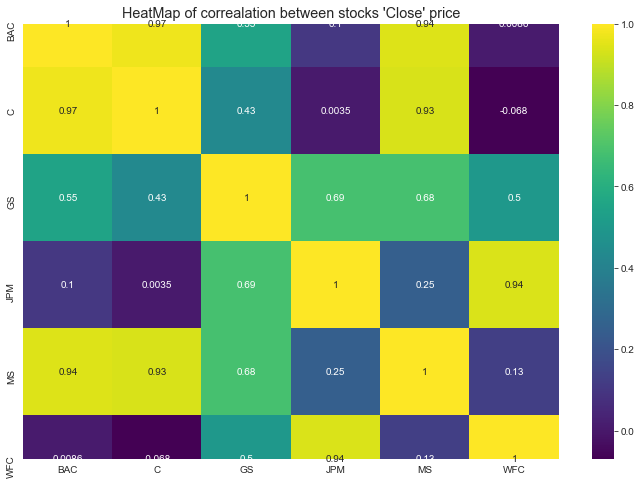

In [14]:
sns.set_style('whitegrid')
plt.figure(figsize=(12,8))
sns.heatmap(bank_stocks.xs('Close',axis=1,level=1).corr(),annot=True,cmap='viridis')
plt.title(r"HeatMap of correalation between stocks 'Close' price")
print(r"HeatMap of correalation between stocks 'Close' price")

Q. Use seaborn's clustermap to cluster the correlations together

Clustermap of corr between stocks 'Close' price


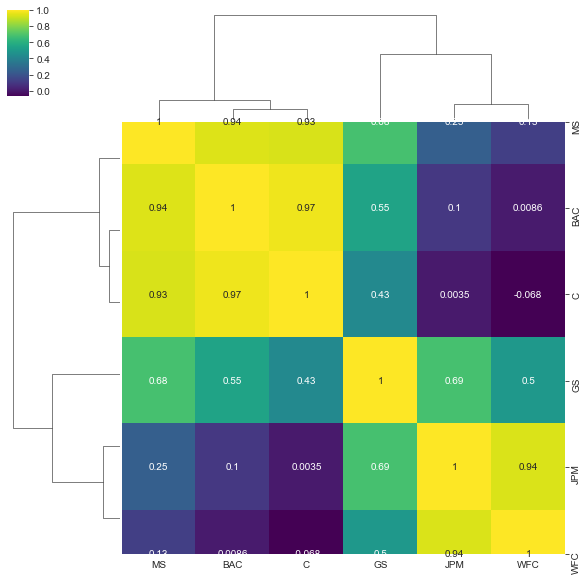

In [15]:
sns.clustermap(bank_stocks.xs('Close',axis=1,level=1).corr(),annot=True,cmap='viridis')
print(r"Clustermap of corr between stocks 'Close' price")

Moving Averages
Let's analyze the moving averages for these stocks in the year 2008.

** Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008**